#### IMPORTING THE REQUIRED LIBRARIES

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

#### EXTRACTING NUMBER PLATE FROM THE WHOLE CAR IMAGE

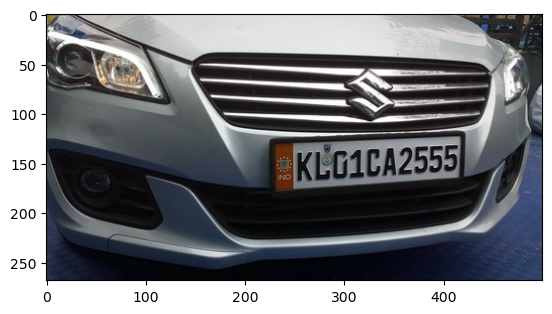

In [27]:
#reading the image
img = cv2.imread("archive/images/Cars0.png")
plt.imshow(normalized_img)

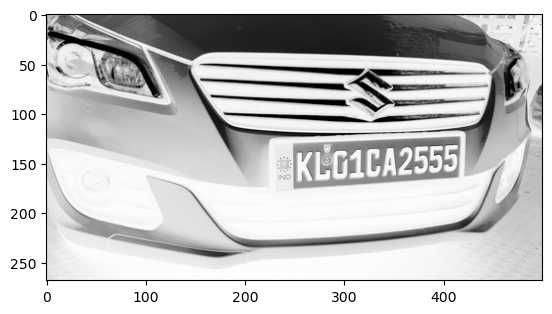

In [12]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap= 'Greys')

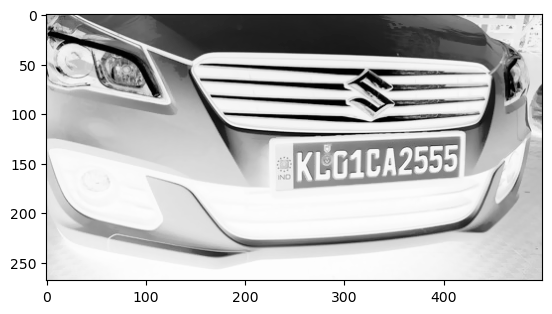

In [13]:
bilateral = cv2.bilateralFilter(gray_img, 5, 5, 5)
plt.imshow(bilateral, cmap = "Greys")

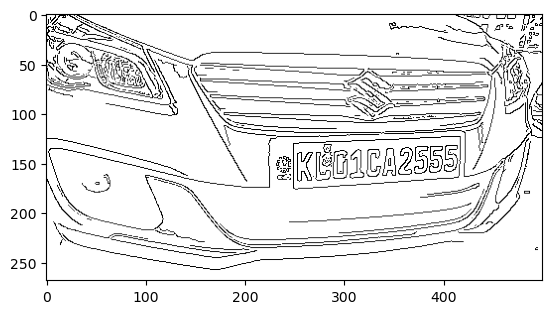

In [14]:
canny = cv2.Canny(bilateral, 50, 150)
plt.imshow(canny, cmap = 'Greys')

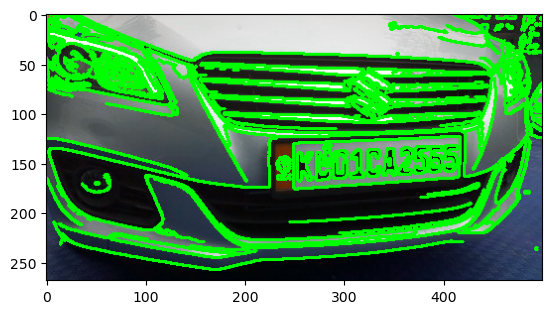

In [15]:
cnts, new = cv2.findContours(canny.copy(),cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
img1 = img.copy()
cv2.drawContours(img1, cnts, -1, (0,255,0), 2)
plt.imshow(img1)

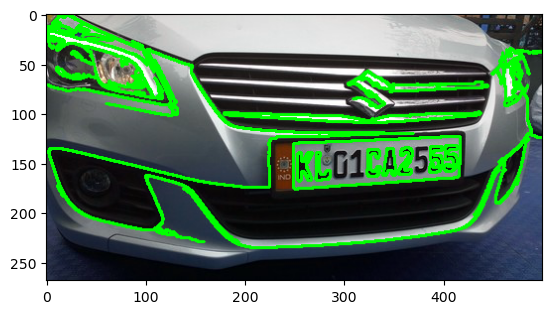

In [16]:
cnts = sorted(cnts, key= cv2.contourArea, reverse = True)[:30]
screenCnt = None
img2 = img.copy()
cv2.drawContours(img2, cnts, -1, (0,255,0), 2)
plt.imshow(img2)

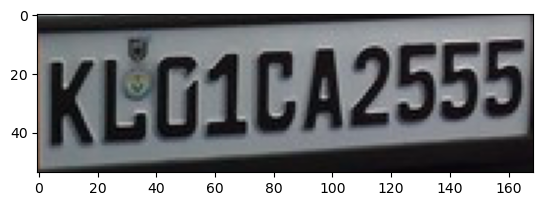

In [17]:
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)
    if len(approx) == 4:
        screenCnt = approx
        x,y,w,h = cv2.boundingRect(c)
        new_img = img[y:y+h,x:x+w]
        plt.imshow(new_img)
        break

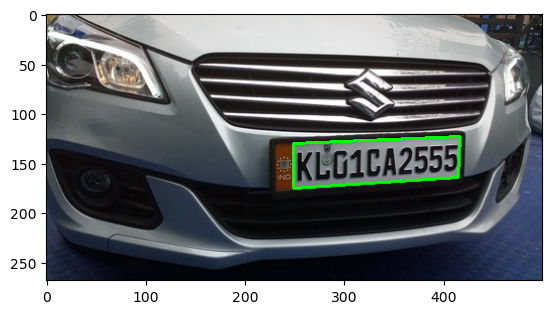

In [18]:
cv2.drawContours(img, [screenCnt], -1, (0,255,0), 2)
plt.imshow(img)

#### EXTRACTING ONLY THE CHARACTERS FROM THE NUMBER PLATE IMAGE

In [ ]:
# Libraries fro DL. 
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [ ]:
df = pd.read_json("/kaggle/input/vehicle-number-plate-detection/Indian_Number_plates.json", lines=True)
df.head()

#### CREATING A MODEL TO PREDICT CHARECTERS AND NUMBERS

In [1]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

NameError: name 'keras' is not defined

In [4]:
x_train = x_train/255
x_test= x_test/255

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer= 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2722 - accuracy: 0.9211
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1224 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0841 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0639 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0522 - accuracy: 0.9840


In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0715 - accuracy: 0.9771


[0.0714874267578125, 0.9771000146865845]

In [11]:
y_predicted = model.predict(x_test)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([7.06559513e-04, 1.83293523e-04, 1.15575731e-01, 9.08390224e-01,
       1.07105038e-07, 1.10782020e-01, 1.38505065e-08, 9.99969840e-01,
       7.69547233e-03, 1.12320133e-01], dtype=float32)

In [12]:
np.argmax(y_predicted[0])

7

In [13]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [14]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

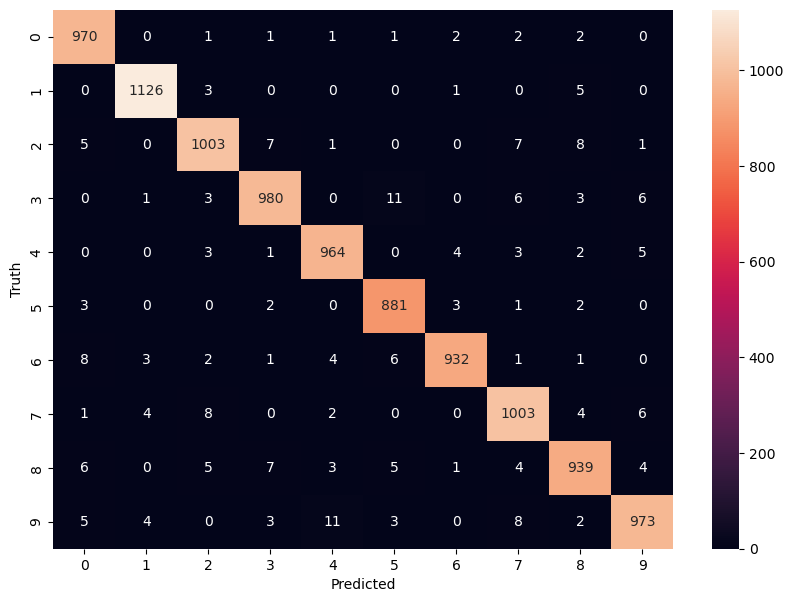

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')